In [1]:
import pandas as pd
import numpy as np
import flatdict
import pickle
from pathlib import Path
import seaborn as sb
import matplotlib.pyplot as plt

# MODEL COMPARISON

In [2]:
exp_paths = [Path('./evaluation/baseline/').glob("*"),
            Path('./evaluation/best_arch_freqs_in/').glob("*"),
            Path('./evaluation/best_arch_freqs_out/').glob("*")
]

exp_dicts = []
for exp_dirs in exp_paths:
    for exp_dir in exp_dirs:

        path_to_res =   exp_dir / Path("results.pkl")
        if not path_to_res.exists():
            continue
        # load config file
        with open(path_to_res, 'rb') as fdtype:
            results = pickle.load(fdtype)
        conf = dict(flatdict.FlatDict(results['conf'], delimiter='.'))
        res = dict(flatdict.FlatDict(results['metrics'], delimiter='.'))
        del res['val.rmse_phase_freq']
        del res['diff.rmse_phase_freq']
        del res['test.rmse_phase_freq']
        del res['val.lsd_freq']
        del res['diff.lsd_freq']
        del res['test.lsd_freq']
        del conf['exp_dir']
        conf["dir"] = exp_dir.name.split("_")[-1]
        exp_dicts.append( conf | res )

In [3]:
df = pd.DataFrame(exp_dicts)
df

,data_h5,seed,ds,grid_type,grid_pattern,model,n_mics,batch_size,epochs,monitor_metric,...,diff.rmse_phase,diff.rmse_time,diff.lsd,diff.coherence,test.rmse_phase,test.rmse_time,test.lsd,test.coherence,test.time,train.time
0,Easycom_N-1020_fs-48k_nrfft-257.h5,666,15,random,checkboard,scf,6,18,2000,loss,...,2.502647,1.371258,10.333636,0.929112,2.477886,1.401831,10.092481,0.919986,0.304173,0.534700
1,Easycom_N-1020_fs-48k_nrfft-257.h5,666,15,random,checkboard,dnn,6,18,2000,loss,...,2.155641,1.148110,18.152447,0.910381,2.131005,1.120151,18.132891,0.861291,0.151327,364.207532
2,Easycom_N-1020_fs-48k_nrfft-257.h5,666,90,random,checkboard,scf,6,18,2000,loss,...,2.493003,1.464772,9.698590,0.947704,2.376027,1.564259,8.510112,0.910463,0.366252,1.619934
3,Easycom_N-1020_fs-48k_nrfft-257.h5,666,30,random,checkboard,dnn,6,18,2000,loss,...,2.204336,1.111605,17.292045,0.854273,2.160759,1.069946,17.323597,0.775061,0.161599,427.233290
4,Easycom_N-1020_fs-48k_nrfft-257.h5,666,60,random,checkboard,dnn,6,18,2000,loss,...,2.181123,1.073019,16.407200,0.759986,2.114374,0.994119,16.533127,0.643812,0.206899,502.944293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Easycom_N-1020_fs-48k_nrfft-257.h5,666,2,regular,checkboard,dnn,6,18,2000,loss,...,1.385817,0.381254,3.706630,0.071907,1.275016,0.369182,3.221521,0.062176,0.297348,957.353478
268,Easycom_N-1020_fs-48k_nrfft-257.h5,666,2,regular,checkboard,dnn,6,18,2000,loss,...,1.377606,0.392120,3.724351,0.071748,1.232898,0.381020,3.199808,0.062526,0.121314,816.992766
269,Easycom_N-1020_fs-48k_nrfft-257.h5,666,2,regular,checkboard,dnn,6,18,2000,loss,...,2.114470,1.174220,3.926095,0.553940,1.783294,0.918657,3.483254,0.344433,0.182034,665.845987
270,Easycom_N-1020_fs-48k_nrfft-257.h5,666,2,regular,checkboard,dnn,6,18,2000,loss,...,1.293996,0.321659,3.511984,0.053636,1.141080,0.303441,2.882168,0.042855,0.231534,1259.586195


In [4]:
df['ds']

0      15
1      15
2      90
3      30
4      60
       ..
267     2
268     2
269     2
270     2
271     2
Name: ds, Length: 272, dtype: int64

In [5]:
df.keys()

Index(['data_h5', 'seed', 'ds', 'grid_type', 'grid_pattern', 'model', 'n_mics',
       'batch_size', 'epochs', 'monitor_metric', 'architecture', 'do_svect',
       'do_bar', 'do_calib', 'do_delay', 'do_freqs_in', 'lr', 'lars',
       'hidden_dim', 'hidden_num', 'do_skip', 'scale_ang', 'scale_freq',
       'loss_mag_lam', 'loss_phase_lam', 'loss_atf_lam', 'loss_air_lam',
       'loss_caus_lam', 'loss_caus_crit', 'loss_rft_lam', 'dir',
       'val.rmse_phase', 'val.rmse_time', 'val.lsd', 'val.coherence',
       'val.time', 'diff.rmse_phase', 'diff.rmse_time', 'diff.lsd',
       'diff.coherence', 'test.rmse_phase', 'test.rmse_time', 'test.lsd',
       'test.coherence', 'test.time', 'train.time'],
      dtype='object')

In [6]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1 ]
# df = df.loc[df["training.train_val_split_perc"] == 80]
df = df.sort_values(by=["test.rmse_time"])
print(df.keys())
df

Index(['ds', 'grid_type', 'model', 'n_mics', 'batch_size', 'architecture',
       'do_svect', 'do_bar', 'do_calib', 'do_delay', 'do_freqs_in',
       'loss_mag_lam', 'loss_phase_lam', 'loss_atf_lam', 'loss_air_lam',
       'loss_caus_lam', 'loss_caus_crit', 'loss_rft_lam', 'dir',
       'val.rmse_phase', 'val.rmse_time', 'val.lsd', 'val.coherence',
       'val.time', 'diff.rmse_phase', 'diff.rmse_time', 'diff.lsd',
       'diff.coherence', 'test.rmse_phase', 'test.rmse_time', 'test.lsd',
       'test.coherence', 'test.time', 'train.time'],
      dtype='object')


,ds,grid_type,model,n_mics,batch_size,architecture,do_svect,do_bar,do_calib,do_delay,...,diff.rmse_phase,diff.rmse_time,diff.lsd,diff.coherence,test.rmse_phase,test.rmse_time,test.lsd,test.coherence,test.time,train.time
186,2,regular,dnn,1,18,SIREN_PHASE_CASCADE,1,1,1,1,...,1.214935,0.260439,3.181831,0.048915,0.979513,0.255759,2.628548,0.037971,0.022192,831.650314
149,2,regular,dnn,1,18,SIREN_PHASE_CASCADE,1,1,1,1,...,1.216000,0.260484,3.187408,0.049253,1.015334,0.256448,2.627584,0.038051,0.130929,803.538153
216,2,regular,dnn,6,18,SIREN_PHASE_CASCADE,1,0,1,1,...,1.281399,0.285625,3.444364,0.050675,1.115671,0.271660,2.832481,0.039972,0.247827,1267.056437
261,2,regular,dnn,6,18,SIREN_PHASE_CASCADE,1,0,1,1,...,1.273764,0.288348,3.452355,0.050646,1.120653,0.275355,2.831413,0.040567,0.411674,1011.185688
249,2,regular,dnn,6,18,SIREN_PHASE_CASCADE,1,1,1,1,...,1.279422,0.284492,3.450975,0.049428,1.134794,0.275652,2.836616,0.039970,0.075524,1050.760323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,45,random,scf,6,18,SCF,0,0,0,0,...,2.490381,1.391458,9.511945,0.929215,2.430648,1.475191,9.092645,0.906190,0.678266,1.737124
12,2,regular,scf,6,18,SCF,0,0,0,0,...,2.472588,1.416661,9.435878,0.932333,2.419058,1.496992,9.340898,0.916086,0.774183,1.152017
15,60,random,scf,6,18,SCF,0,0,0,0,...,2.484846,1.415899,9.516076,0.929549,2.412974,1.511600,8.924151,0.908687,0.628856,1.968165
11,75,random,scf,6,18,SCF,0,0,0,0,...,2.488958,1.455894,9.528096,0.937571,2.398884,1.548208,8.688438,0.918290,0.700582,0.889117


In [7]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1 ]
# df = df.loc[df["training.train_val_split_perc"] == 80]
df = df.sort_values(by=["test.coherence"])
print(df.keys())
df

Index(['ds', 'grid_type', 'model', 'n_mics', 'batch_size', 'architecture',
       'do_svect', 'do_bar', 'do_calib', 'do_delay', 'do_freqs_in',
       'loss_mag_lam', 'loss_phase_lam', 'loss_atf_lam', 'loss_air_lam',
       'loss_caus_lam', 'loss_caus_crit', 'loss_rft_lam', 'dir',
       'val.rmse_phase', 'val.rmse_time', 'val.lsd', 'val.coherence',
       'val.time', 'diff.rmse_phase', 'diff.rmse_time', 'diff.lsd',
       'diff.coherence', 'test.rmse_phase', 'test.rmse_time', 'test.lsd',
       'test.coherence', 'test.time', 'train.time'],
      dtype='object')


,ds,grid_type,model,n_mics,batch_size,architecture,do_svect,do_bar,do_calib,do_delay,...,diff.rmse_phase,diff.rmse_time,diff.lsd,diff.coherence,test.rmse_phase,test.rmse_time,test.lsd,test.coherence,test.time,train.time
186,2,regular,dnn,1,18,SIREN_PHASE_CASCADE,1,1,1,1,...,1.214935,0.260439,3.181831,0.048915,0.979513,0.255759,2.628548,0.037971,0.022192,831.650314
149,2,regular,dnn,1,18,SIREN_PHASE_CASCADE,1,1,1,1,...,1.216000,0.260484,3.187408,0.049253,1.015334,0.256448,2.627584,0.038051,0.130929,803.538153
249,2,regular,dnn,6,18,SIREN_PHASE_CASCADE,1,1,1,1,...,1.279422,0.284492,3.450975,0.049428,1.134794,0.275652,2.836616,0.039970,0.075524,1050.760323
216,2,regular,dnn,6,18,SIREN_PHASE_CASCADE,1,0,1,1,...,1.281399,0.285625,3.444364,0.050675,1.115671,0.271660,2.832481,0.039972,0.247827,1267.056437
261,2,regular,dnn,6,18,SIREN_PHASE_CASCADE,1,0,1,1,...,1.273764,0.288348,3.452355,0.050646,1.120653,0.275355,2.831413,0.040567,0.411674,1011.185688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,30,random,scf,6,18,SCF,0,0,0,0,...,2.504374,1.394560,9.722201,0.937652,2.458152,1.457395,9.394669,0.923759,0.643434,0.996284
73,2,regular,dnn,6,48,SIREN_PHASE,0,0,0,0,...,2.731099,1.118260,24.540596,0.937309,2.705357,1.119999,24.564526,0.930128,3.709226,494.387197
134,2,regular,dnn,6,48,SIREN_PHASE,0,0,0,0,...,2.731099,1.118260,24.540596,0.937309,2.705357,1.119999,24.564526,0.930128,3.737019,502.731829
26,2,regular,dnn,6,48,SIREN_PHASE,0,0,1,0,...,2.799284,1.119033,24.965789,0.946672,2.774412,1.120833,24.988316,0.939778,5.545789,528.355505


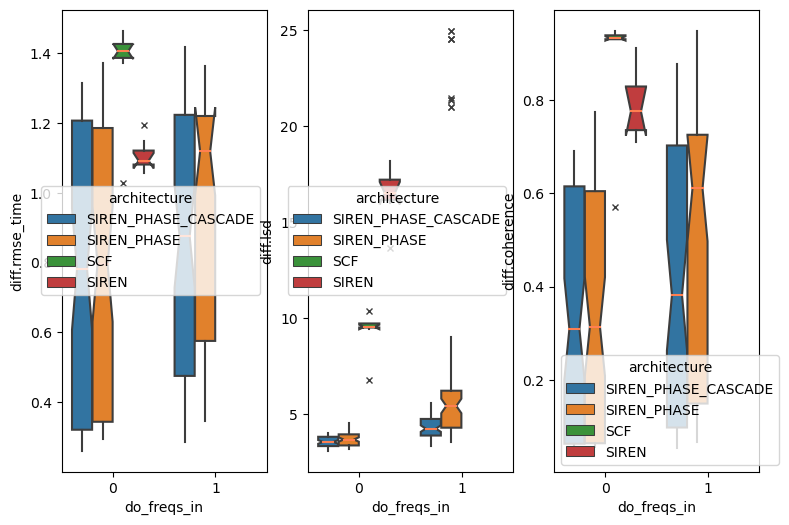

In [8]:
fig, axarr = plt.subplots(1, 3, figsize=(9,6))
for m, metric in enumerate(["diff.rmse_time", "diff.lsd", "diff.coherence"]):
    sb.boxplot( ax=axarr[m],
                data=df, x="do_freqs_in", y=metric, hue="architecture", notch=True,
                showcaps=False,
                flierprops={"marker": "x"},
                medianprops={"color": "coral"},
    )   

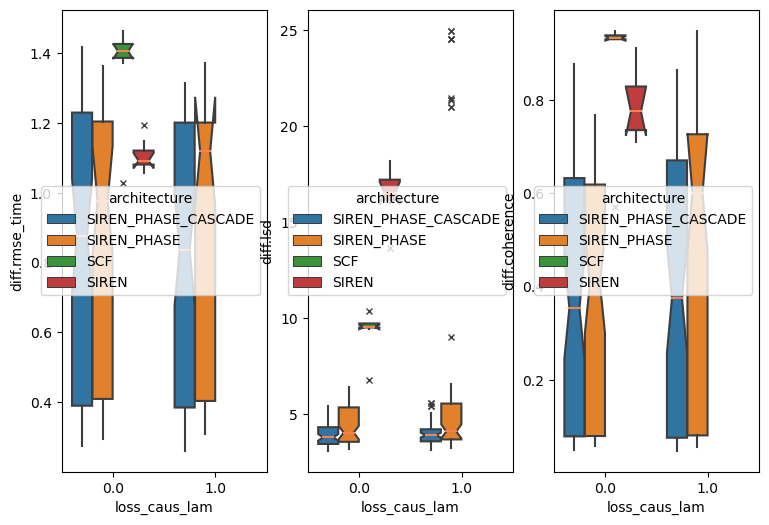

In [9]:
fig, axarr = plt.subplots(1, 3, figsize=(9,6))
for m, metric in enumerate(["diff.rmse_time", "diff.lsd", "diff.coherence"]):
    sb.boxplot( ax=axarr[m],
                data=df, x="loss_caus_lam", y=metric, hue="architecture", notch=True,
                showcaps=False,
                flierprops={"marker": "x"},
                medianprops={"color": "coral"},
    )

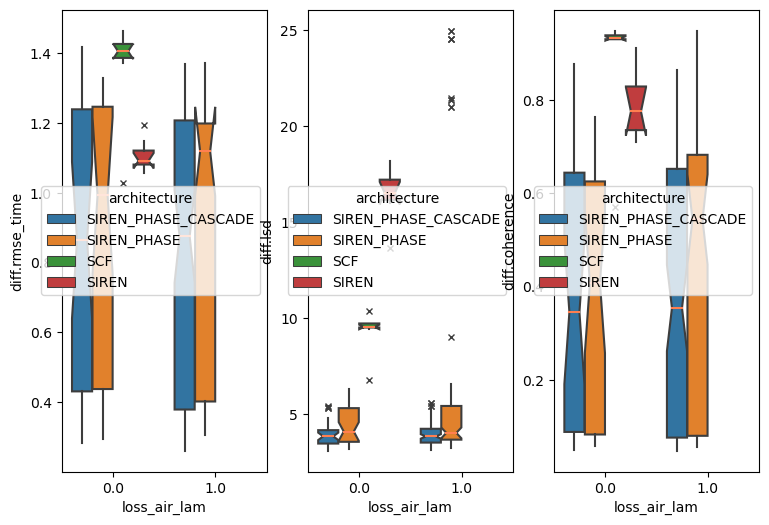

In [10]:
fig, axarr = plt.subplots(1, 3, figsize=(9,6))
for m, metric in enumerate(["diff.rmse_time", "diff.lsd", "diff.coherence"]):
    sb.boxplot( ax=axarr[m],
                data=df, x="loss_air_lam", y=metric, hue="architecture", notch=True,
                showcaps=False,
                flierprops={"marker": "x"},
                medianprops={"color": "coral"},
    )

In [30]:
n_mics = 6
df_freqs_in = df.loc[(df["do_freqs_in"] == 1) 
                & (df["n_mics"] == n_mics)
]
df_freqs_out = df.loc[(df["do_freqs_in"] == 0) 
                & (df["n_mics"] == n_mics) 
]

print(df_freqs_out.keys())
df_freqs_out["loss_caus_lam"]

Index(['ds', 'grid_type', 'model', 'n_mics', 'batch_size', 'architecture',
       'do_svect', 'do_bar', 'do_calib', 'do_delay', 'do_freqs_in',
       'loss_mag_lam', 'loss_phase_lam', 'loss_atf_lam', 'loss_air_lam',
       'loss_caus_lam', 'loss_caus_crit', 'loss_rft_lam', 'dir',
       'val.rmse_phase', 'val.rmse_time', 'val.lsd', 'val.coherence',
       'val.time', 'diff.rmse_phase', 'diff.rmse_time', 'diff.lsd',
       'diff.coherence', 'test.rmse_phase', 'test.rmse_time', 'test.lsd',
       'test.coherence', 'test.time', 'train.time'],
      dtype='object')


249    1.0
216    0.0
261    0.0
158    0.0
147    1.0
      ... 
2      0.0
12     0.0
11     0.0
0      0.0
8      0.0
Name: loss_caus_lam, Length: 78, dtype: float64

In [31]:
pivot = pd.pivot_table(df_freqs_out, 
        index=["architecture", "do_calib", "do_svect", "do_bar", "do_delay",
        "loss_atf_lam", "loss_mag_lam", "loss_phase_lam", "loss_air_lam", "loss_caus_lam","loss_rft_lam", "dir"], 
        values=["val.lsd", "diff.lsd", "diff.rmse_time", "diff.coherence"], 
        aggfunc = ['mean'])
pivot.style.background_gradient(cmap='inferno_r')

In [13]:
curr_df = df.loc[(df["do_freqs_in"] == 0) 
                & (df["n_mics"] == n_mics)
                & (df["architecture"].isin(["SCF", "SIREN"]))
]

pivot = pd.pivot_table(curr_df, 
        index=["architecture", "do_calib", "do_svect", "do_bar", "do_delay",
        "loss_atf_lam", "loss_mag_lam", "loss_phase_lam", "loss_air_lam", "loss_caus_lam","loss_rft_lam"], 
        values=["diff.rmse_time", "diff.coherence"], 
        aggfunc = ['mean'])
pivot.style.background_gradient(cmap='inferno_r').format("{:.3f}")

In [39]:
pivot = pd.pivot_table(df_freqs_in, 
        index=["do_freqs_in", "architecture", "do_svect", "do_bar", "do_delay", "do_calib",
        "loss_atf_lam", "loss_mag_lam", "loss_phase_lam", "loss_air_lam", "loss_caus_lam","loss_rft_lam", "dir"], 
        values=["val.lsd", "diff.lsd", "diff.rmse_time", "diff.coherence"], 
        aggfunc = ['mean'])
pivot.style.background_gradient(cmap='inferno_r')

In [44]:
print('Freqs OUT')
curr_df = df.loc[(df["do_freqs_in"] == 1) 
                & (df["n_mics"] == n_mics)
                & (df["architecture"].isin(["SIREN_PHASE", "SIREN_PHASE_CASCADE"]))
                & (df["do_svect"] == 1)
                & (df["do_calib"] == 0.)
                & (df["do_bar"] == 1)
                & (df["loss_atf_lam"] == 0)
                & (df["loss_mag_lam"] == 1)
                & (df["loss_phase_lam"] == 10)
                & (df["loss_air_lam"] == 0)
                & (df["loss_caus_lam"] == 0)
                & (df["loss_rft_lam"] == 0)
]
print(len(curr_df))
pivot = pd.pivot_table(curr_df, 
        index=["loss_mag_lam", "loss_phase_lam", "loss_air_lam","loss_rft_lam", "dir","architecture",], 
        values=["diff.rmse_time", "diff.coherence"], 
        aggfunc = ['mean',"count"])
pivot.style.background_gradient(cmap='inferno_r').format("{:.3f}")

Freqs OUT
2


In [45]:
print('Freqs OUT')
curr_df = df.loc[(df["do_freqs_in"] == 1) 
                & (df["n_mics"] == n_mics)
                & (df["architecture"].isin(["SIREN_PHASE", "SIREN_PHASE_CASCADE"]))
                & (df["do_svect"] == 1)
                & (df["do_calib"] == 0.)
                & (df["do_bar"] == 1)
                & (df["loss_atf_lam"] == 0)
                & (df["loss_mag_lam"] == 1)
                & (df["loss_phase_lam"] == 10)
                & (df["loss_air_lam"] == 1)
                & (df["loss_caus_lam"] == 1)
                & (df["loss_rft_lam"] == 0)
]

pivot = pd.pivot_table(curr_df, 
        index=["architecture", "loss_mag_lam", "loss_phase_lam", "loss_air_lam","loss_rft_lam", "dir"], 
        values=["diff.rmse_time", "diff.coherence"], 
        aggfunc = ['mean',"count"])
pivot.style.background_gradient(cmap='inferno_r').format("{:.3f}")

Freqs OUT


In [49]:
print('Freqs OUT')
curr_df = df.loc[(df["do_freqs_in"] == 1) 
                & (df["n_mics"] == n_mics)
                & (df["architecture"].isin(["SIREN_PHASE", "SIREN_PHASE_CASCADE"]))
                & (df["do_svect"] == 1)
                & (df["do_calib"] == 0.)
                & (df["do_bar"] == 1)
                & (df["loss_atf_lam"] == 0)
                & (df["loss_mag_lam"] == 1)
                & (df["loss_phase_lam"] == 10)
                & (df["loss_air_lam"] == 1)
                & (df["loss_caus_lam"] == 1)
                & (df["loss_rft_lam"] == 1)
]

pivot = pd.pivot_table(curr_df, 
        index=["loss_mag_lam", "loss_phase_lam", "loss_air_lam","loss_rft_lam", "dir","architecture"], 
        values=["diff.rmse_time", "diff.coherence"], 
        aggfunc = ['mean',"count"])
pivot.style.background_gradient(cmap='inferno_r').format("{:.3f}")


Freqs OUT
